# Import Required Libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import logging

# Load and Prepare Data

In [5]:
df = pd.read_csv("database SFRC.csv")

In [6]:
df.head(5)

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
0,251.0,150.0,28.1,0.0267,3.0876,0.4875,565.0,0.75,112.9500
1,251.0,150.0,25.3,0.0267,3.0876,0.4875,565.0,0.75,79.0650
2,251.0,150.0,27.9,0.0267,3.0876,0.6500,565.0,1.00,109.1850
3,251.0,150.0,26.2,0.0267,3.0876,0.6500,565.0,1.00,123.4920
4,251.0,150.0,28.1,0.0267,3.0876,0.9750,565.0,1.50,111.0675


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   d(mm)    488 non-null    float64
 1   B(mm)    488 non-null    float64
 2   fc(Mpa)  488 non-null    float64
 3   Rr       488 non-null    float64
 4   av/d     488 non-null    float64
 5   F        488 non-null    float64
 6   fy(Mpa)  488 non-null    float64
 7   vf%      488 non-null    float64
 8   Vu (KN)  488 non-null    float64
dtypes: float64(9)
memory usage: 34.4 KB


# EDA - Exploratory Data Analysis

In [8]:
# Check the missing Values
df.isnull().sum()

d(mm)      0
B(mm)      0
fc(Mpa)    0
Rr         0
av/d       0
F          0
fy(Mpa)    0
vf%        0
Vu (KN)    0
dtype: int64

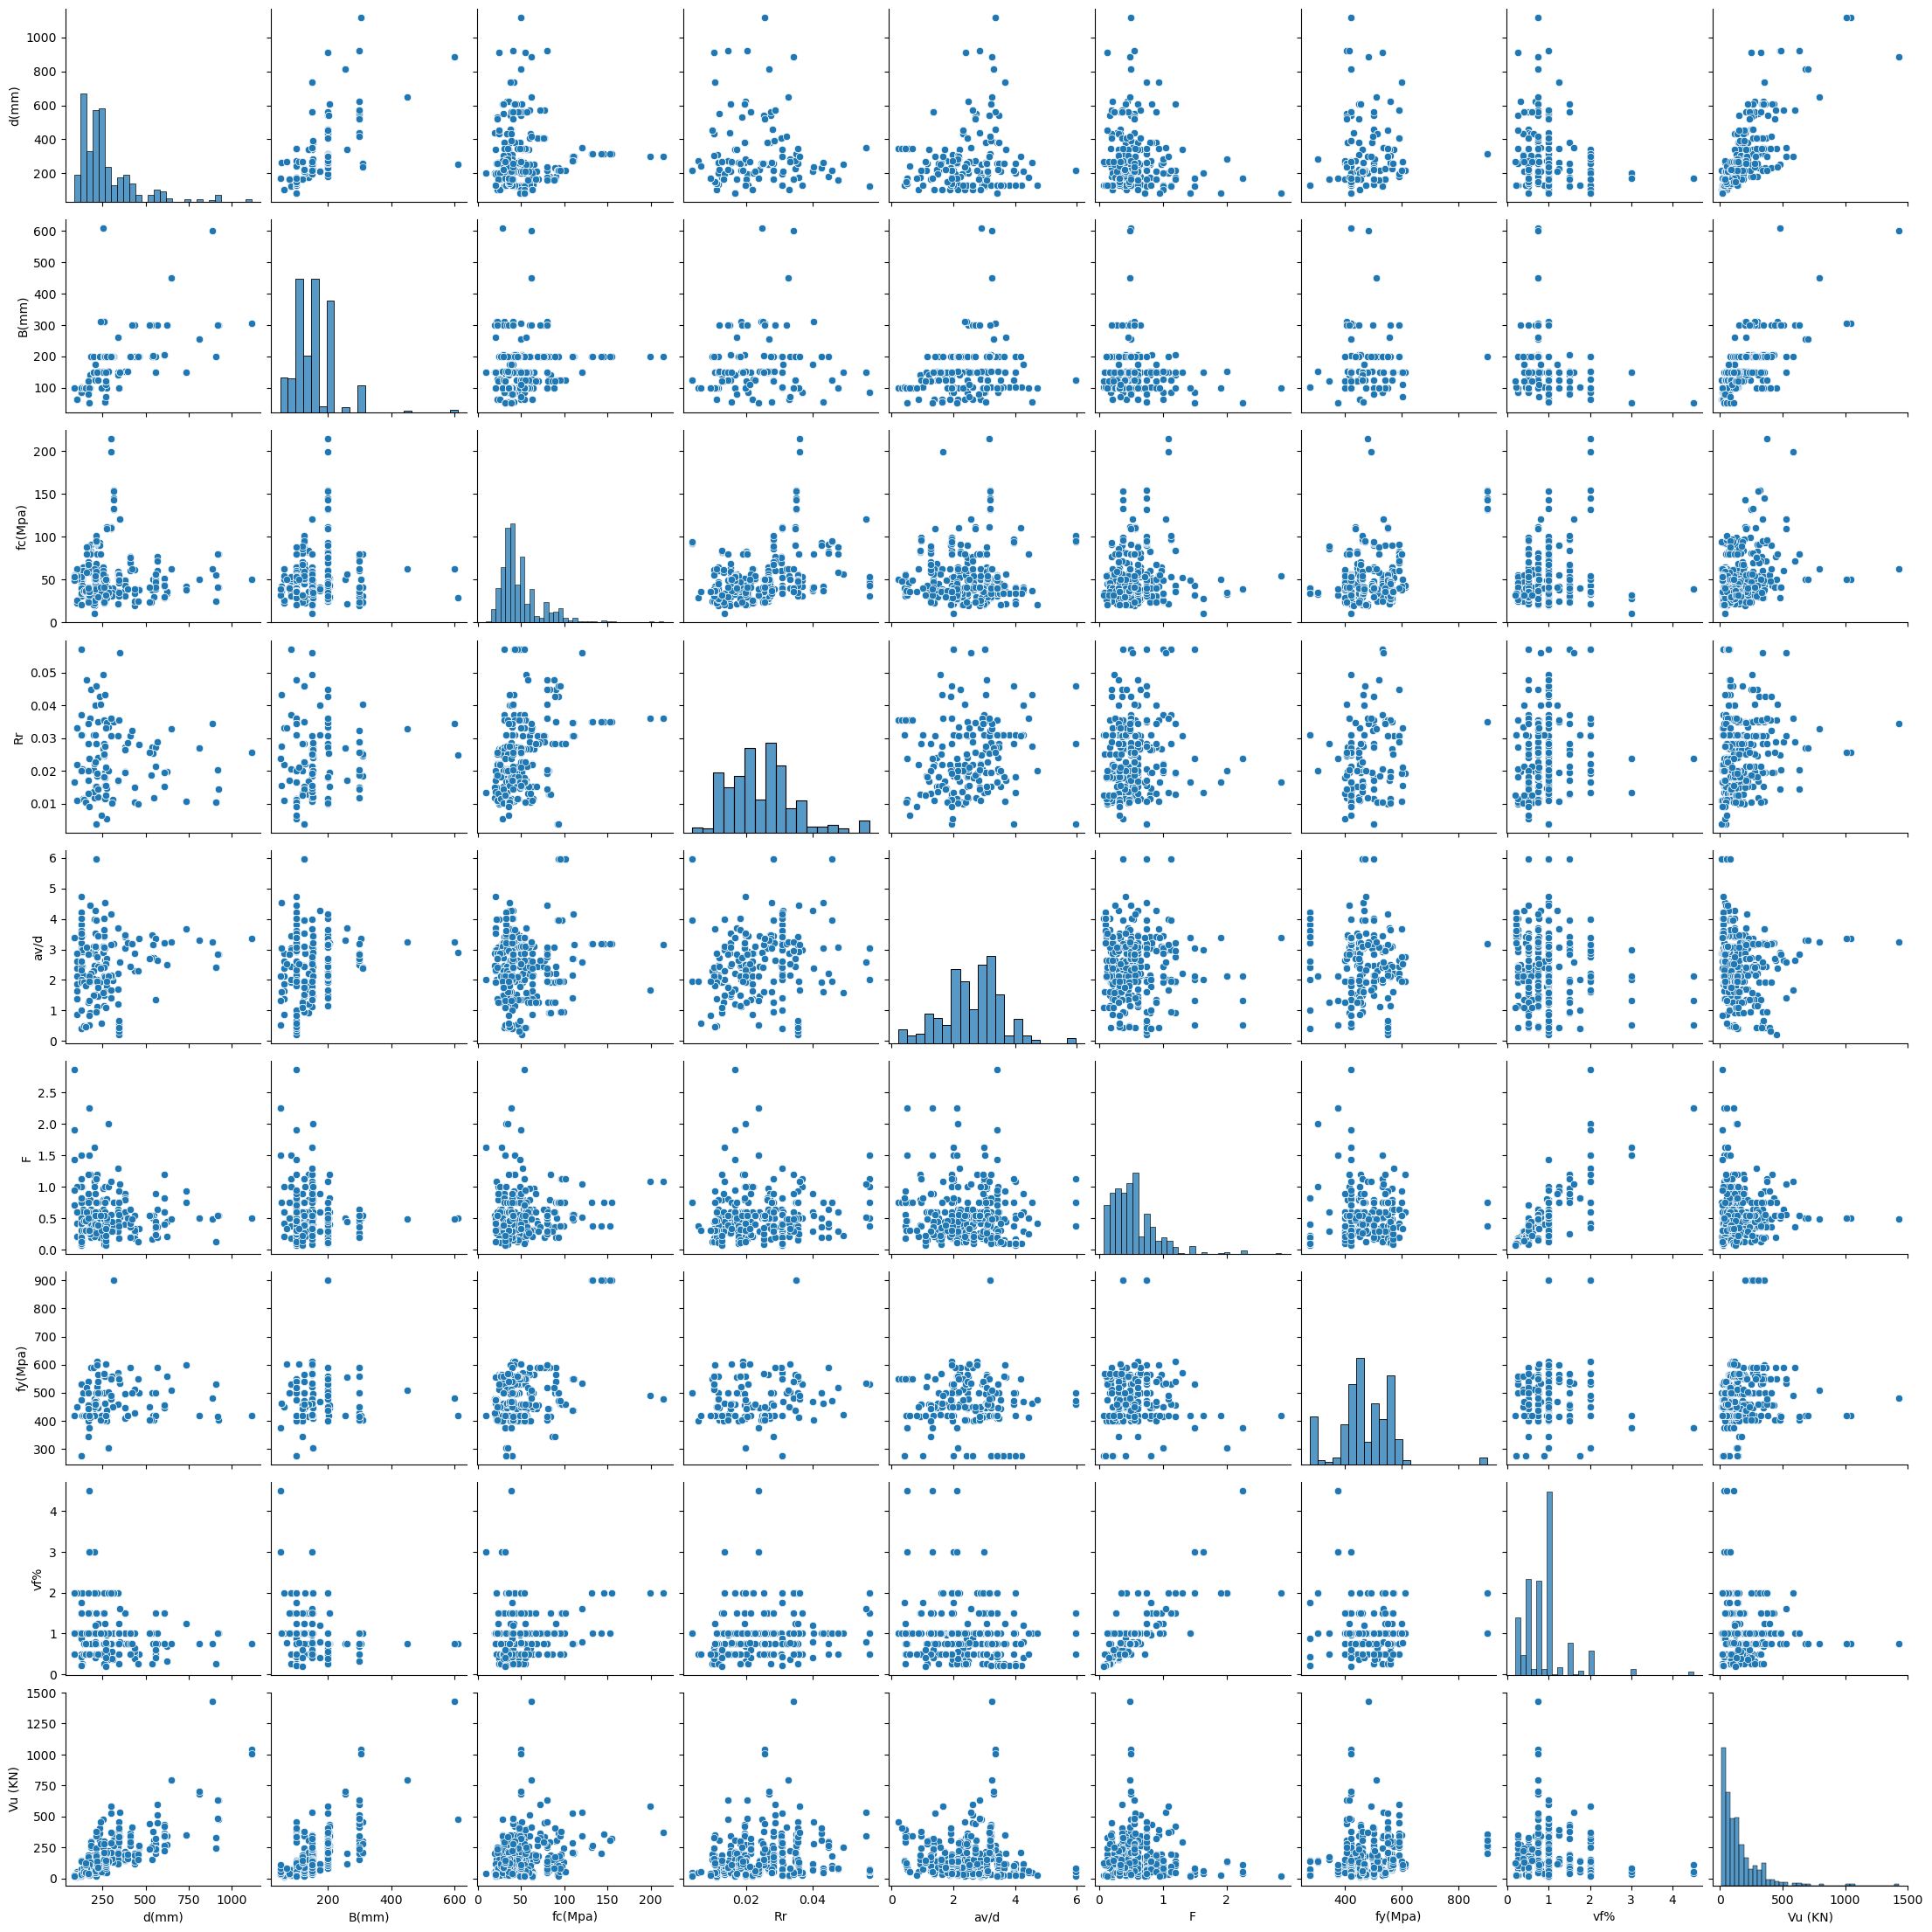

In [9]:
 # Visualize the data using seaborn Pairplots
sns.pairplot(df)
plt.show()

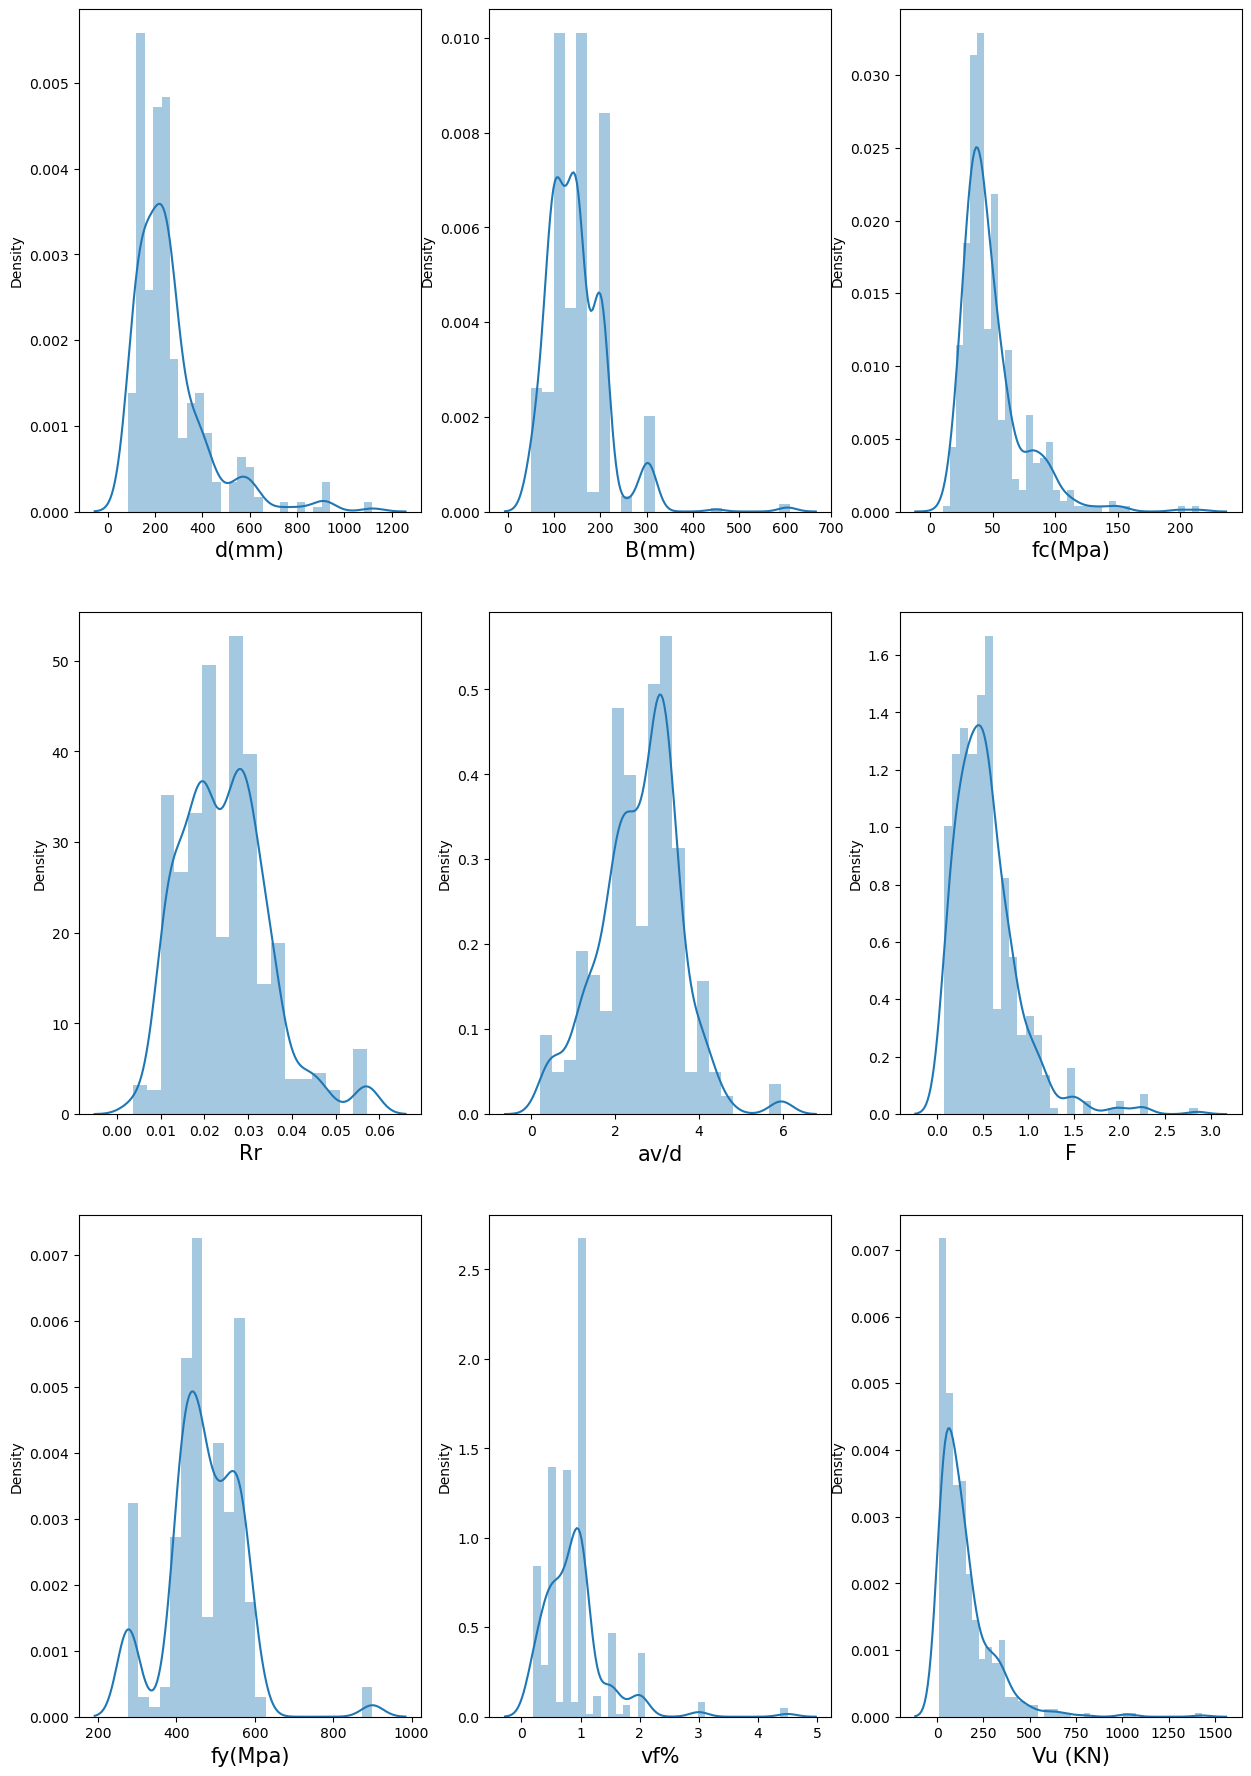

In [74]:
# Data Distribution plot
plt.figure(figsize=(15,30), facecolor = 'white')
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Data Transformation

In [10]:
# convert into DataFrame
data = pd.DataFrame(df)
data

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
0,251.0,150.0,28.1,0.0267,3.0876,0.487500,565.0,0.75,112.950000
1,251.0,150.0,25.3,0.0267,3.0876,0.487500,565.0,0.75,79.065000
2,251.0,150.0,27.9,0.0267,3.0876,0.650000,565.0,1.00,109.185000
3,251.0,150.0,26.2,0.0267,3.0876,0.650000,565.0,1.00,123.492000
4,251.0,150.0,28.1,0.0267,3.0876,0.975000,565.0,1.50,111.067500
...,...,...,...,...,...,...,...,...,...
483,300.0,200.0,215.0,0.0360,3.1667,1.090909,479.0,2.00,371.500000
484,300.0,200.0,199.0,0.0360,1.6667,1.090909,490.0,2.00,585.500000
485,266.0,120.0,31.9,0.0126,1.0902,0.075000,420.0,0.20,126.210909
486,266.0,120.0,31.9,0.0126,1.0902,0.150000,420.0,0.40,132.682909


In [7]:
X = df.drop(['Vu (KN)'], axis = 1)
y = df['Vu (KN)']
X.shape
y.shape

(488,)

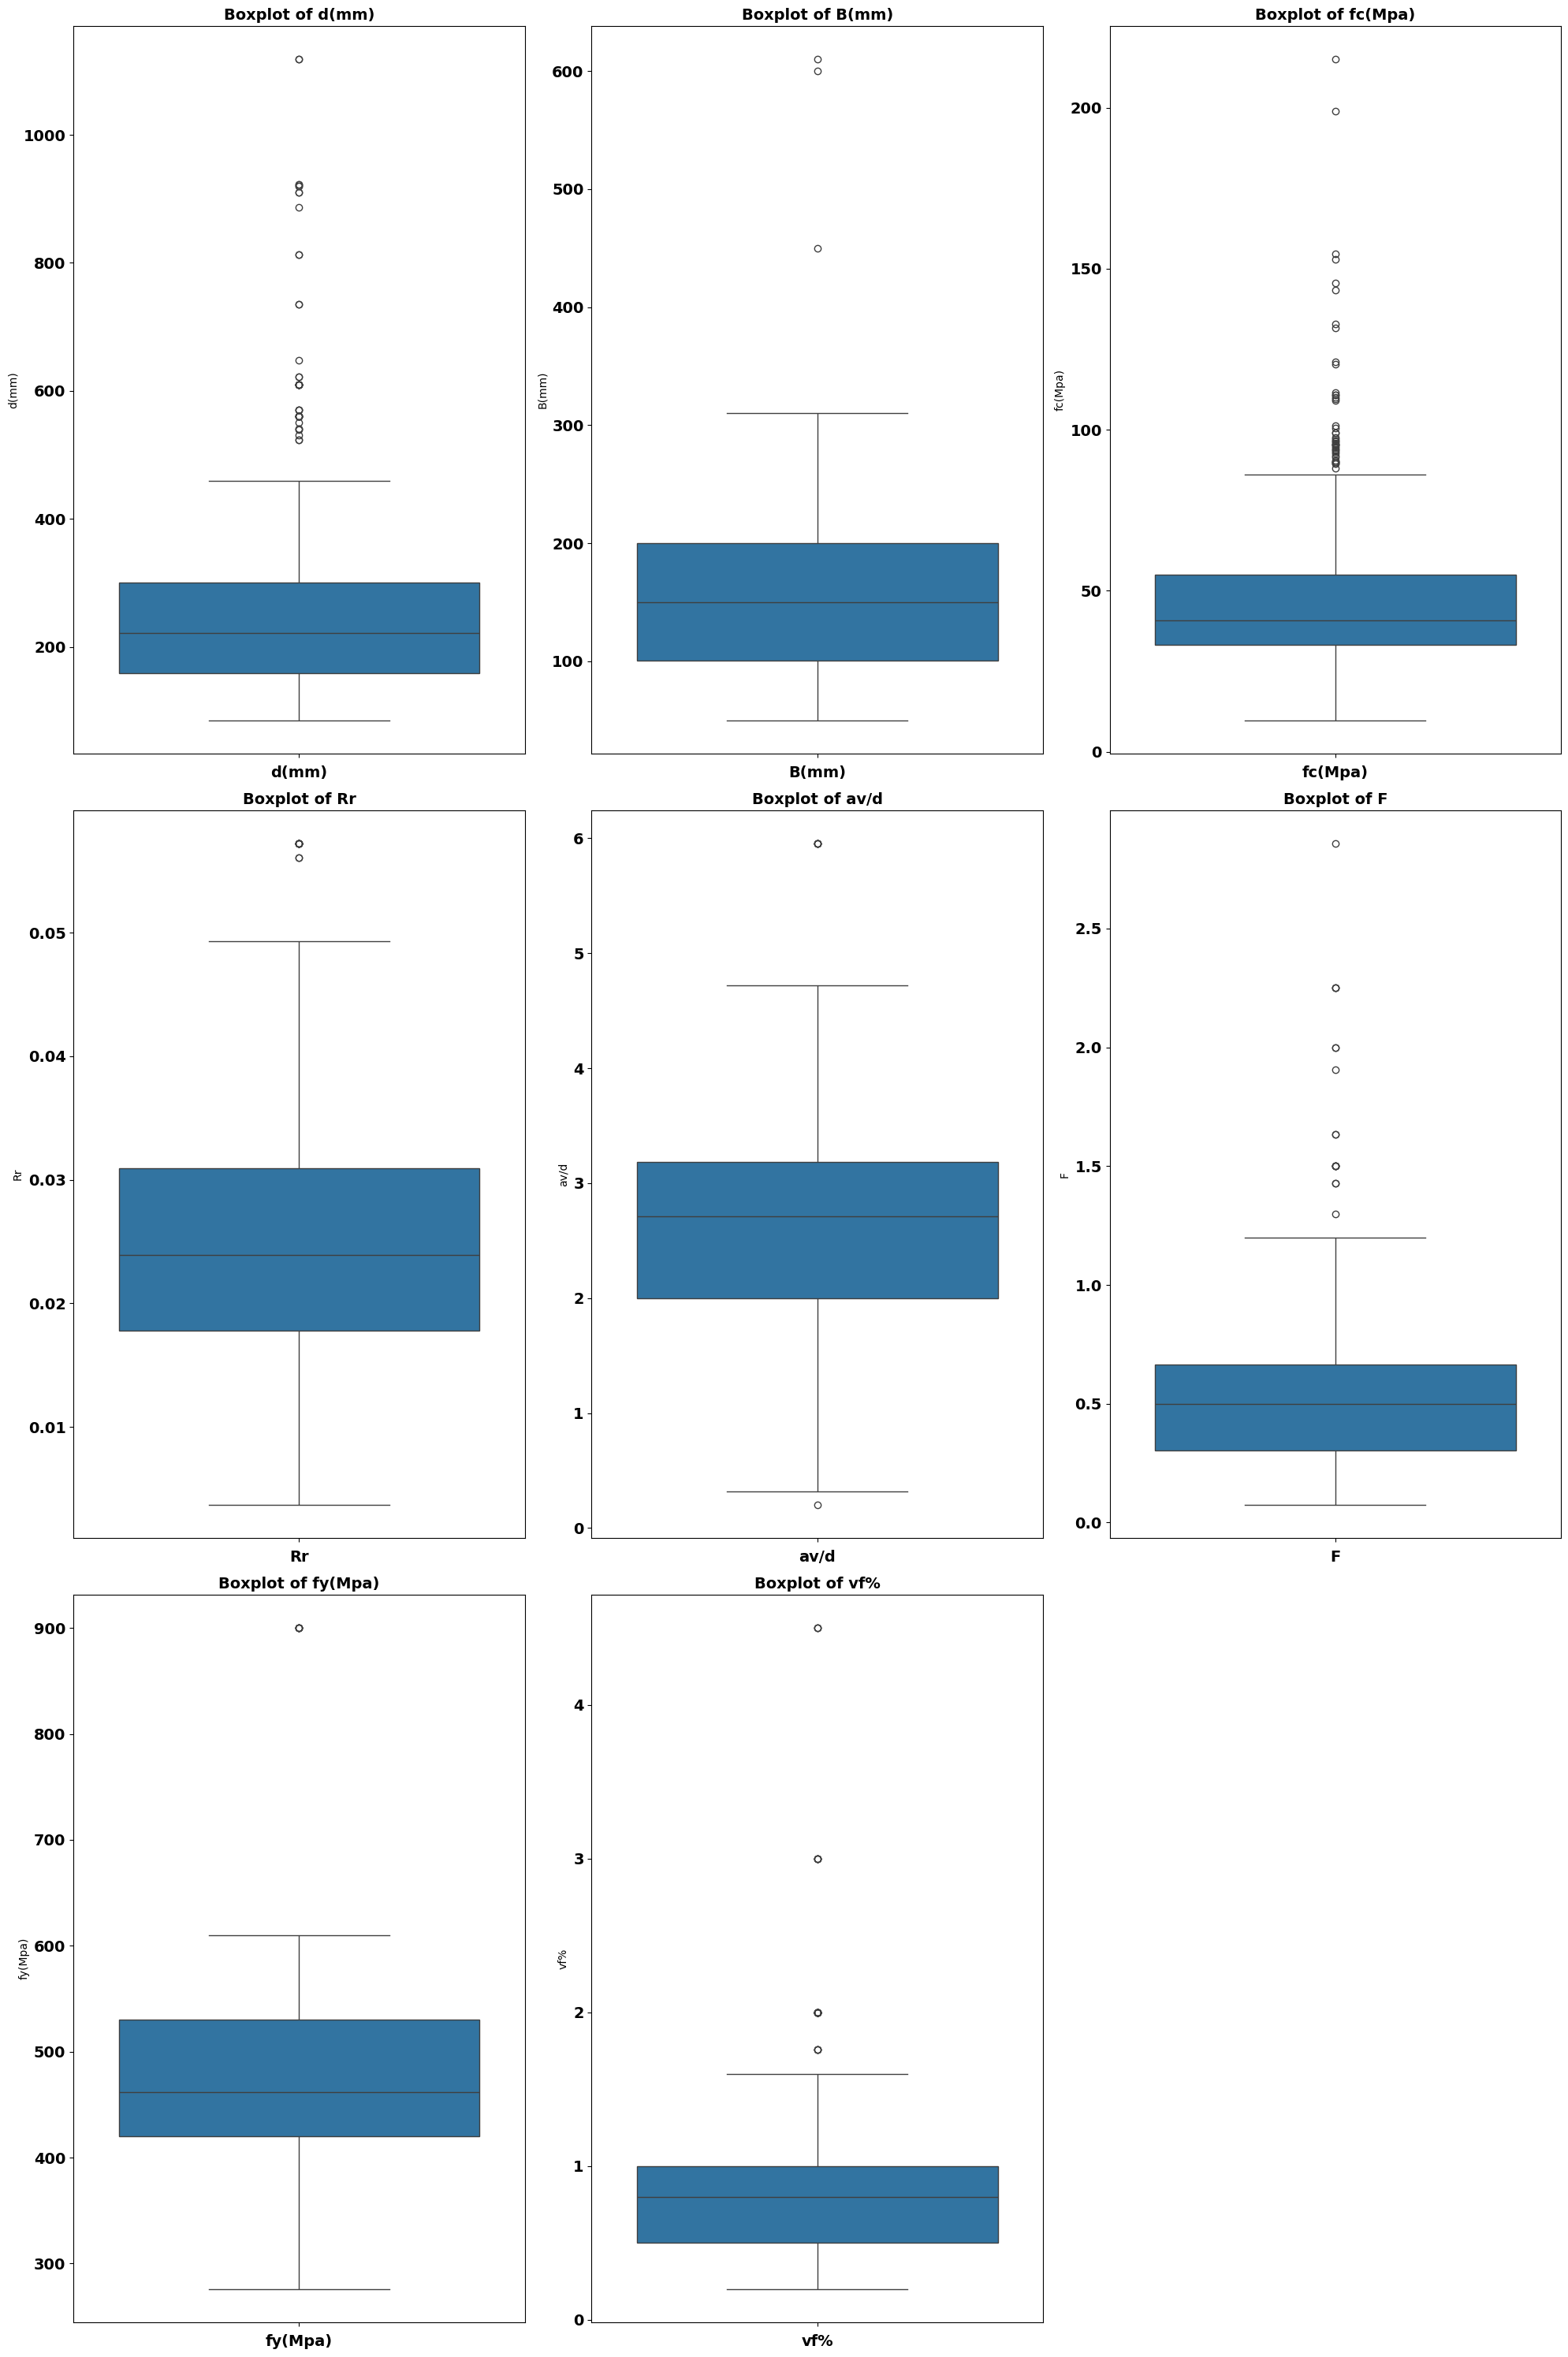

In [36]:
# check for outliers with Box plot

plt.figure(figsize=(20, 30), facecolor='white')  
plotnumber = 1

for column in X.columns:
    ax = plt.subplot((len(X.columns) // 3) + 1, 3, plotnumber)  
    sns.boxplot(y=X[column]) 
    
    # Move feature names to X-axis instead of Y-axis
    plt.xlabel(column, fontsize=14, fontweight='bold')  
    plt.title(f'Boxplot of {column}', fontsize=14, fontweight='bold')  
    
    # Ensure y-axis numbers are visible
    plt.yticks(fontsize=14, fontweight='bold')  
    
    plotnumber += 1

plt.tight_layout()  
plt.show()

In [8]:
df.describe()

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,264.202971,148.022746,48.991496,0.024563,2.604004,0.539549,470.245824,0.889170,148.364144
std,160.532443,64.874376,25.176735,0.010077,0.947298,0.359614,97.156011,0.549692,149.927020
min,85.250000,50.000000,9.770000,0.003700,0.202900,0.075000,275.862069,0.200000,12.824460
25%,159.000000,100.750000,33.220000,0.017800,2.000000,0.303000,420.000000,0.500000,47.534200
50%,222.000000,150.000000,40.750000,0.023900,2.713200,0.498750,462.000000,0.800000,108.816905
75%,300.000000,200.000000,55.075000,0.030900,3.184700,0.666094,530.000000,1.000000,190.221479
max,1118.000000,610.000000,215.000000,0.057200,5.953500,2.857500,900.000000,4.500000,1430.000000


# Distribution plot of target variable and features

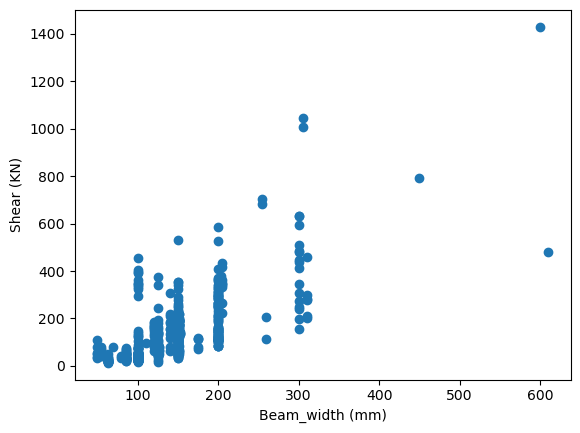

In [19]:
plt.scatter(df['B(mm)'],df['Vu (KN)'])
plt.xlabel('Beam_width (mm)')
plt.ylabel('Shear (KN)')
plt.show()

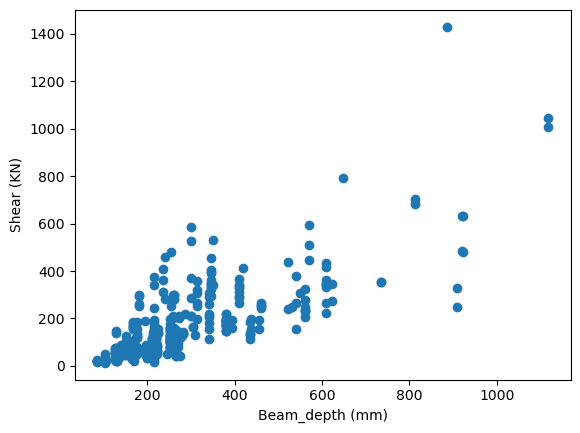

In [80]:
plt.scatter(df['d(mm)'],df['Vu (KN)'])
plt.xlabel('Beam_depth (mm)')
plt.ylabel('Shear (KN)')
plt.show()

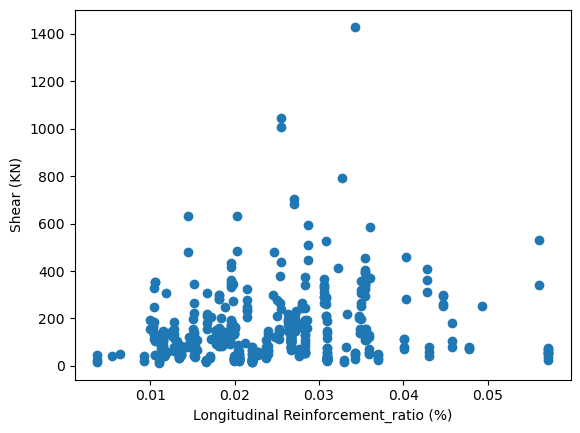

In [81]:
plt.scatter(df['Rr'],df['Vu (KN)'])
plt.xlabel('Longitudinal Reinforcement_ratio (%)')
plt.ylabel('Shear (KN)')
plt.show()

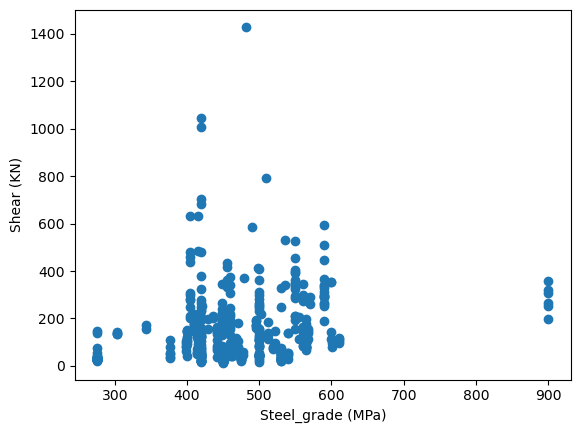

In [82]:
plt.scatter(df['fy(Mpa)'],df['Vu (KN)'])
plt.xlabel('Steel_grade (MPa)')
plt.ylabel('Shear (KN)')
plt.show()

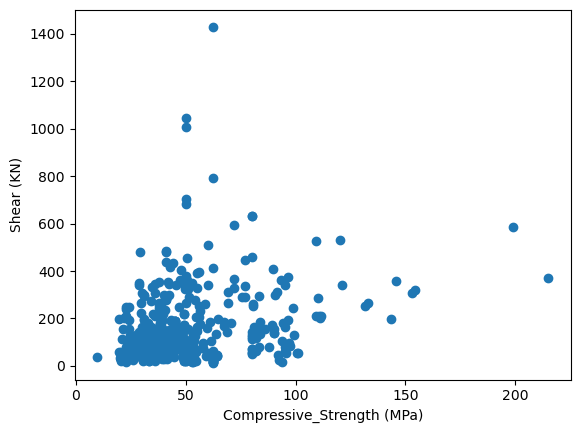

In [83]:
plt.scatter(df['fc(Mpa)'],df['Vu (KN)'])
plt.xlabel('Compressive_Strength (MPa)')
plt.ylabel('Shear (KN)')
plt.show()

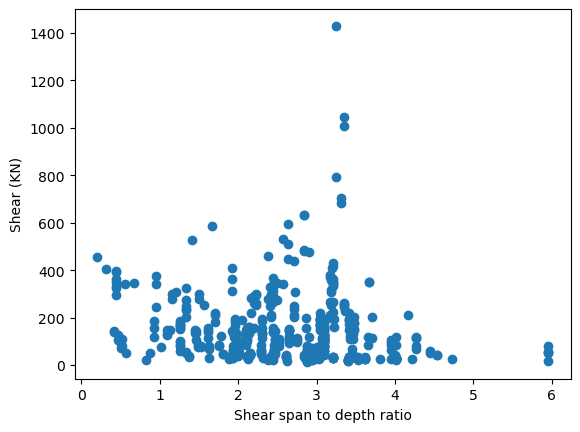

In [84]:
plt.scatter(df['av/d'],df['Vu (KN)'])
plt.xlabel('Shear span to depth ratio')
plt.ylabel('Shear (KN)')
plt.show()

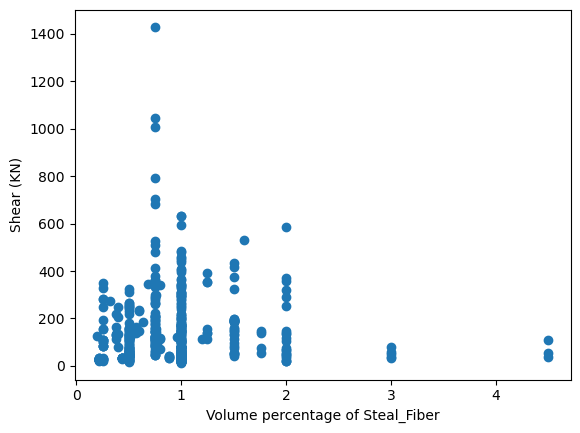

In [85]:
plt.scatter(df['vf%'],df['Vu (KN)'])
plt.xlabel('Volume percentage of Steal_Fiber')
plt.ylabel('Shear (KN)')
plt.show()

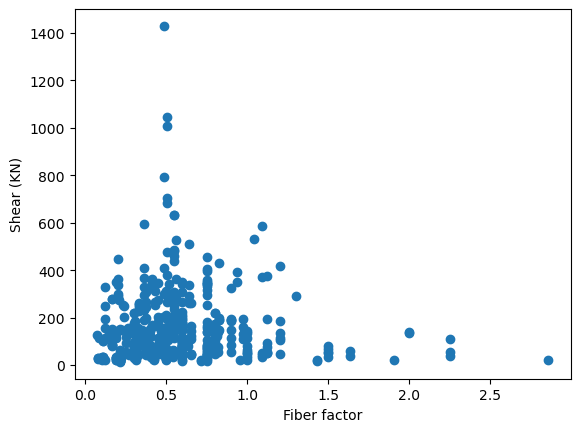

In [86]:
plt.scatter(df['F'],df['Vu (KN)'])
plt.xlabel('Fiber factor')
plt.ylabel('Shear (KN)')
plt.show()

# Scalarization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[ 1.166672  ,  1.39629996, -0.57229189, ...,  1.77772727,
        -1.53927875, -1.5167539 ],
       [-1.76005707, -0.74182832,  0.33244299, ...,  1.35989763,
         0.38808011, -0.09423893],
       [ 0.21972731,  0.50551216, -0.3931418 , ...,  1.09591768,
         0.00250987, -0.95157304],
       ...,
       [ 0.5396252 ,  0.51827577,  1.3368904 , ..., -0.88366153,
        -0.84294599,  1.29848678],
       [-0.78129232,  0.34796455, -0.47355   , ..., -0.53840158,
         1.52604451,  0.89459143],
       [-1.30479832, -0.76470284, -0.8873402 , ..., -0.67730935,
        -1.59122496,  1.01744482]])

# Data Preprocessing

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 64)

In [13]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train

array([[ 0.10892429, -0.1428802 ,  0.81893535, ...,  0.9179891 ,
        -0.28981001,  0.36466749],
       [ 0.7654714 , -0.21905211,  0.36626756, ..., -0.03840833,
         0.23134815,  1.02079886],
       [ 1.18996794,  1.01401001,  1.16053144, ...,  1.72572452,
         0.24728316, -0.76430995],
       ...,
       [ 0.11007283,  0.39111461, -1.26059265, ..., -0.18451488,
         1.5077599 , -1.3883098 ],
       [-0.7819576 ,  0.36326876, -0.4738188 , ..., -0.55598607,
         1.52860747,  0.89408491],
       [-1.32460039,  0.54553236,  0.31238152, ...,  1.15056267,
         1.41314338, -0.99316468]])

In [14]:
X_normal = (X - X.min()) / (X.max() - X.min())
X_normal

,Beam Width,Beam Depth,Reinforcement Ratio,Reinforcement Strength,Shear Span to Depth Ratio,Compressive Strength of Concrete,Volume Percentage of Steel Fiber,Steel Fiber Factor
0,0.839931,0.921784,0.330634,0.704591,0.770865,0.995027,0.062008,0.048557
1,0.000225,0.317060,0.592325,0.941827,0.920839,0.878821,0.614363,0.468623
2,0.568244,0.669843,0.382453,0.809122,0.696287,0.805403,0.503863,0.215454
3,0.914010,0.807166,0.944982,0.543903,0.010515,0.582135,0.868733,0.286183
4,0.406483,0.337622,0.695534,0.074584,0.436754,0.664896,0.432773,0.074828
...,...,...,...,...,...,...,...,...
483,0.295020,0.774610,0.235879,0.137149,0.889565,0.998754,0.846342,0.555033
484,0.389380,0.705709,0.529539,0.914329,0.618340,0.773256,0.336448,0.027637
485,0.660025,0.673453,0.882857,0.102383,0.847348,0.254843,0.261568,0.879893
486,0.281042,0.625284,0.359195,0.922695,0.665915,0.350866,0.940487,0.760623


# Define the XGBoost Model

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

XGB1 = GradientBoostingRegressor(random_state=0)
XGB1.fit(X_train, y_train)


GradientBoostingRegressor(random_state=0)

In [16]:
XGB1.feature_importances_

array([0.14237384, 0.12814475, 0.09895412, 0.08813778, 0.08052801,
       0.13246259, 0.15003851, 0.1793604 ])

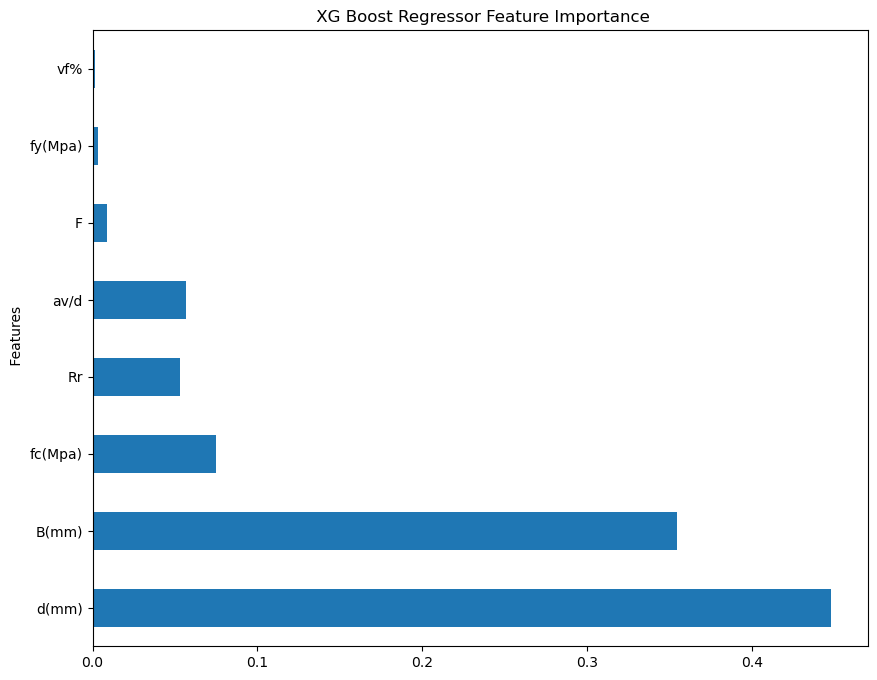

In [15]:
importances = pd.Series(XGB1.feature_importances_ , index=X.columns)
plt.xlabel(" Feature Importance")
plt.ylabel(" Features")
plt.title(" XG Boost Regressor Feature Importance")
importances.plot(kind = 'barh', figsize=(10,8))
plt.show()

# Model Evaluation

In [17]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,XGB1.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,XGB1.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,XGB1.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,XGB1.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,XGB1.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,XGB1.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,XGB1.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,XGB1.predict(X_train)))

The RMSE  on the testing dataset is:  29.190671247218102
The RMSE  on the training dataset is:  17.878168684707518
The MSE  on the testing dataset is:  852.0952878631656
The MSE  on the training dataset is:  319.62891551885656
The MAE  on the testing dataset is:  24.864784647665946
The MAE  on the training daset is:  14.849960100980878
The r2_score on the testing dataset is:  -0.08561278062723288
The r2_score on the training dataset is:  0.620056897585892


# Set up the Hyperparameter Grid for GridSearchCV

In [ ]:

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 200, 300],
           'colsample_bytree': [0.3, 0.7]}

XGB = xgb.XGBRegressor(seed = 20)

XGB = GridSearchCV(estimator=XGB, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
XGB.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [17]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,XGB.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,XGB.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,XGB.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,XGB.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,XGB.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,XGB.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,XGB.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,XGB.predict(X_train)))

The RMSE  on the testing dataset is:  25.73685371605846
The RMSE  on the training dataset is:  15.663143521138956
The MSE  on the testing dataset is:  662.3856392017921
The MSE  on the training dataset is:  245.33406496379726
The MAE  on the testing dataset is:  17.179056564453223
The MAE  on the training daset is:  11.185676281877326
The r2_score on the testing dataset is:  0.9730134467973943
The r2_score on the training dataset is:  0.9887974180182413


In [18]:
XGB_TEST = XGB.predict(X_test)

In [19]:
XGB_TRAIN = XGB.predict(X_train)

# Visualize Actual Vs Predicted

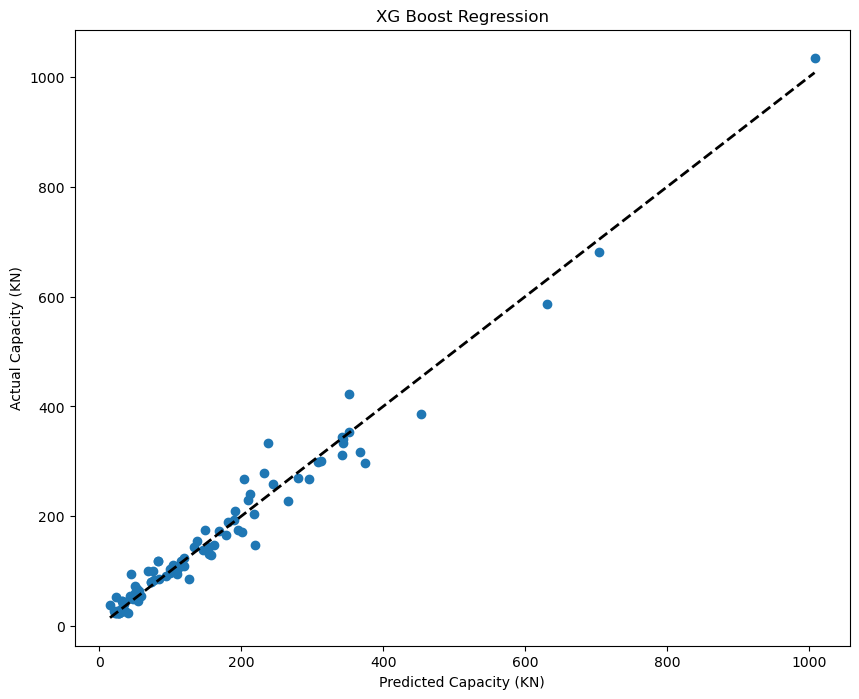

In [67]:
plt.figure(figsize=(10,8))
plt.title('XG Boost Regression')
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.scatter(y_test,XGB_TEST)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Prediction with new data

In [29]:
X1 = np.array(X)

In [30]:
X1[0].reshape(1,-1)

array([[2.5100e+02, 1.5000e+02, 2.8100e+01, 2.6700e-02, 3.0876e+00,
        4.8750e-01, 5.6500e+02, 7.5000e-01]])

In [31]:
XGB.predict(scaler.transform(X1[0].reshape(1,-1)))

array([97.345985], dtype=float32)

# Pickling The Model For Deployment

In [32]:
import pickle
with open('XGB_pkl', 'wb')as f:
    pickle.dump(XGB,f)


In [33]:
pickled_model = pickle.load(open('XGB_pkl', 'rb'))


In [34]:
pickled_model.predict(scaler.transform(X1[0].reshape(1,-1)))

array([97.345985], dtype=float32)

In [47]:
Xn = np.array([[221, 152, 34, 0.012, 2.45, 0.3, 448, 0.5]])
pickled_model.predict(scaler.transform(Xn.reshape(1,-1)))

array([68.98645], dtype=float32)

In [37]:
pip install shap xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import shap
import xgboost

In [22]:

# Train XGBoost Model
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
# Ensure X_train is a DataFrame with column names
feature_names = ["beam width", "Beam Depth", "reinforcement ratio", "reinforcement strength", "shear span to depth ratio", "compressive sterength of concrete", "volume percentage of steel fiber", "steel fiber factor"]
X_train = pd.DataFrame(X_train, columns=feature_names)


In [24]:
# Create SHAP explainer
explainer = shap.Explainer(model)

In [25]:
# Compute SHAP values
shap_values = explainer(X_train)

In [3]:

# Select the first instance (change index as needed)
instance_idx = 0
shap_vals_instance = shap_values[instance_idx].values  # SHAP values for this sample

# Get feature names
feature_names = X_train.columns

# Sort features by absolute impact
sorted_idx = np.argsort(np.abs(shap_vals_instance))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.barh(feature_names[sorted_idx], shap_vals_instance[sorted_idx], color=["red" if v > 0 else "blue" for v in shap_vals_instance[sorted_idx]])
plt.xlabel("SHAP Value Impact")
plt.ylabel("Feature")
plt.title(f"SHAP Value Impact for Instance {instance_idx}")
plt.grid()
plt.show()


NameError: name 'shap_values' is not defined

In [65]:
import shap
import xgboost

In [66]:
# Define feature columns and target variable
feature_names = [
    "Beam Width", "Beam Depth", "Reinforcement Ratio", "Reinforcement Strength",
    "Shear Span to Depth Ratio", "Compressive Strength of Concrete",
    "Volume Percentage of Steel Fiber", "Steel Fiber Factor"
]


In [67]:
# Create SHAP Explainer
explainer = shap.Explainer(model, X_train)

In [68]:
# Compute SHAP values
shap_values = explainer(X_train)

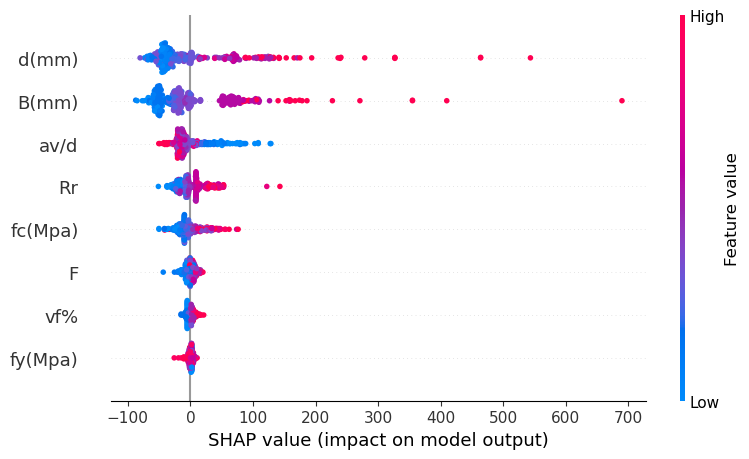

In [69]:

# **Feature Importance Summary Plot**
shap.summary_plot(shap_values, X_train)


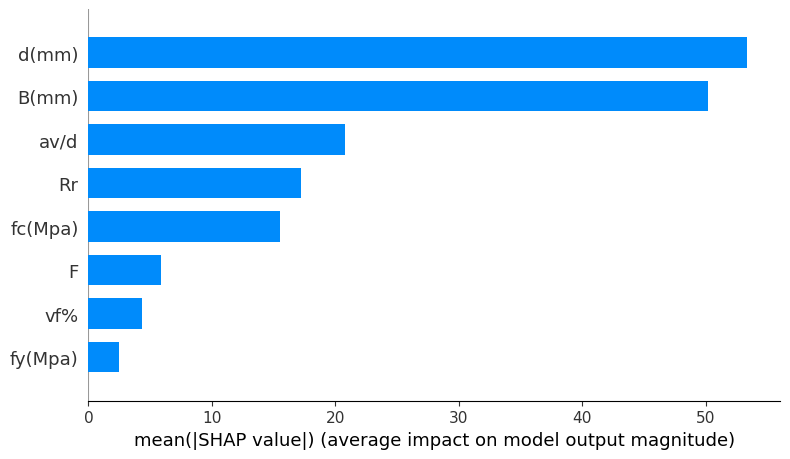

In [70]:
# **Bar Plot for Mean Absolute SHAP Values**
shap.summary_plot(shap_values, X_train, plot_type="bar")

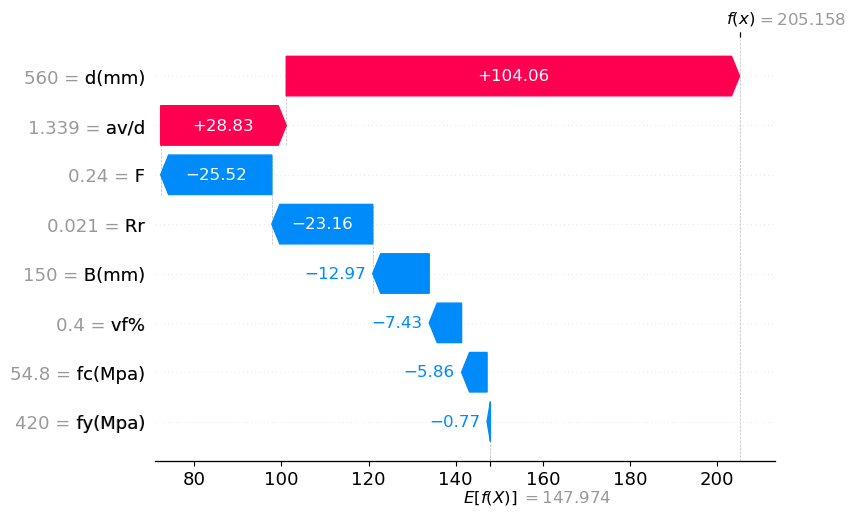

In [77]:

# **Waterfall Plot for a Specific Prediction (First Sample)**
shap.waterfall_plot(shap_values[280])

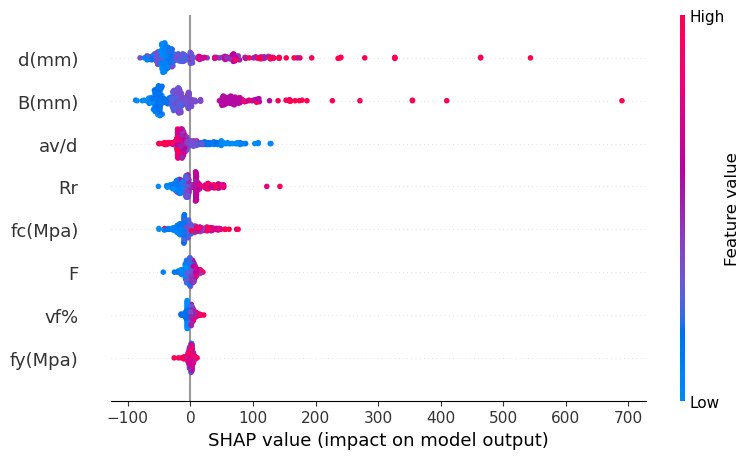

In [64]:
shap.summary_plot(shap_values, X_train)


### corrlation Matrix

In [8]:
# Step 1: Compute Correlation Matrix
correlation_matrix = X_train.copy()
correlation_matrix['Vu (KN)'] = y_train  
correlation = correlation_matrix.corr()  

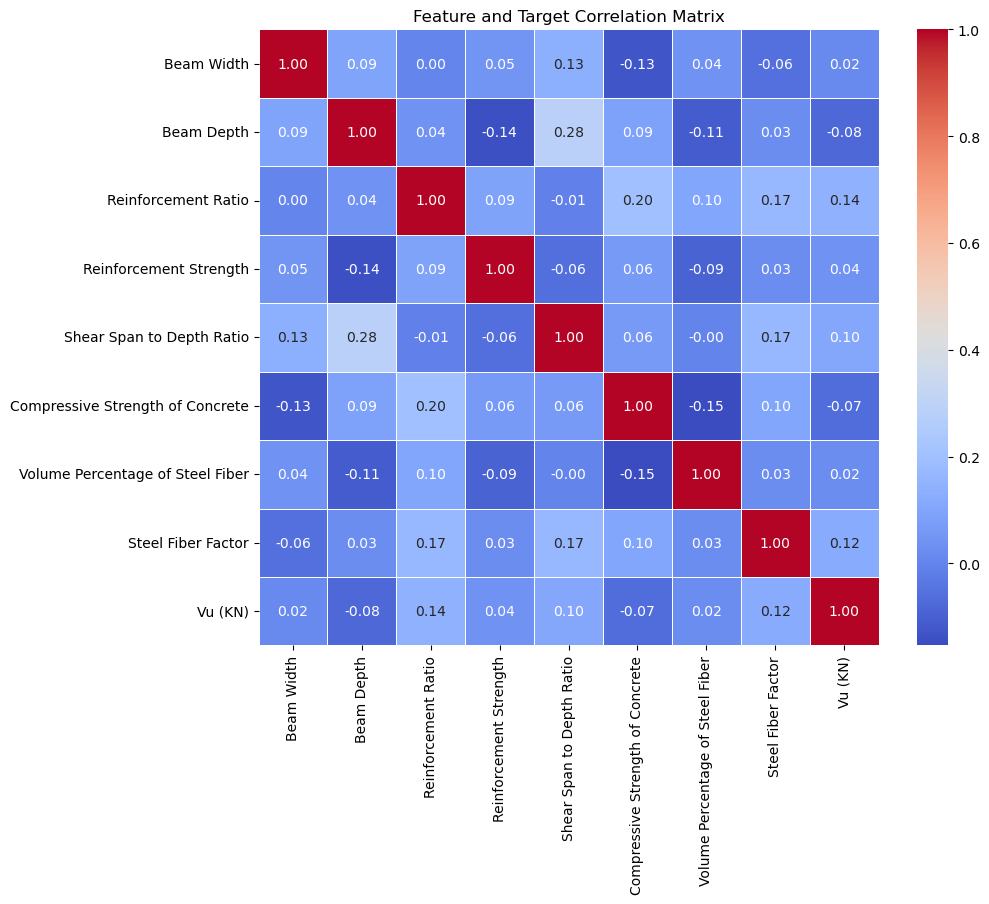

In [10]:
# Plotting the correlation matrix as a heatmap
import seaborn as sns 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature and Target Correlation Matrix")
plt.show()

### Waterfall plot

In [26]:
import xgboost as xgb

# Train the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)  # Ensure X_train and y_train are properly defined


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
model.save_model("XGB_BEAM_E.json") 


In [32]:
import numpy as np
arr = np.array([10])

# Ensure the index is within the bounds of the array
index = 1
if index < arr.size:
    print(arr[index])  # Accessing the element safely
else:
    print(f"Index {index} is out of bounds for this array.")


Index 1 is out of bounds for this array.


In [30]:
# Load the saved XGBoost model
model = xgb.XGBRegressor()
model.load_model("XGB_BEAM_E.json") 

In [31]:
# Load your dataset
X_train = pd.read_csv("database SFRC.csv")  
X_train = X_train.drop(columns=['Vu (KN)']) 

In [32]:
# Create SHAP explainer
explainer = shap.Explainer(model, X_train)


In [33]:
# Select an instance to analyze
instance_idx = 250 # Change index to analyze a different row
shap_values = explainer(X_train.iloc[[instance_idx]]) 

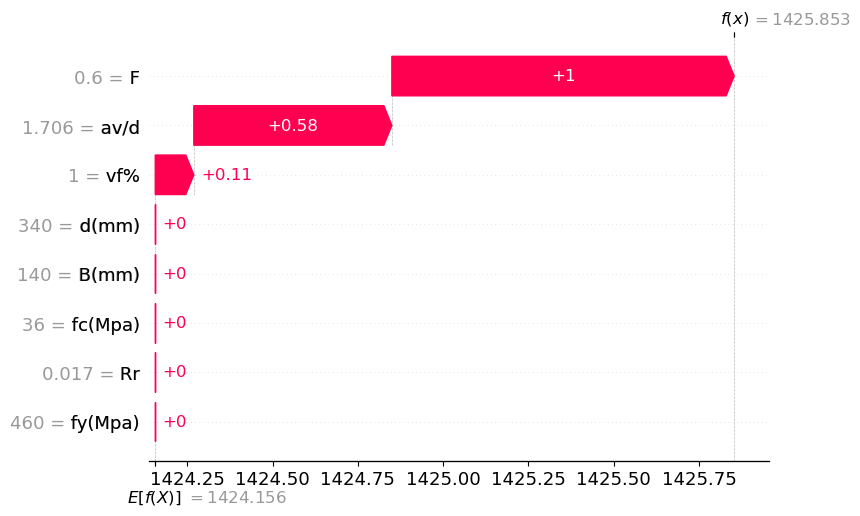

In [34]:
# Generate and display the SHAP waterfall plot
shap.waterfall_plot(shap_values[0])
plt.show()


### Partial dependence Plot 

In [47]:
import xgboost as xgb
from sklearn.inspection import PartialDependenceDisplay

In [48]:
# Fix potential NumPy array conversion issues
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=X.columns)
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()  # Convert DataFrame to Series if needed

In [49]:
#  Ensure alignment of X_train and y_train
X_train, y_train = X_train.align(y_train, axis=0)

In [50]:
# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [51]:
# Check available feature names
print("Available features:", X_train.columns.tolist())

Available features: ['d(mm)', 'B(mm)', 'fc(Mpa)', 'Rr', 'av/d', 'F', 'fy(Mpa)', 'vf%']


In [52]:
# Define actual feature names
features = ["d(mm)", "B(mm)", "fc(Mpa)", "Rr", "av/d", "F", "fy(Mpa)", "vf%"]

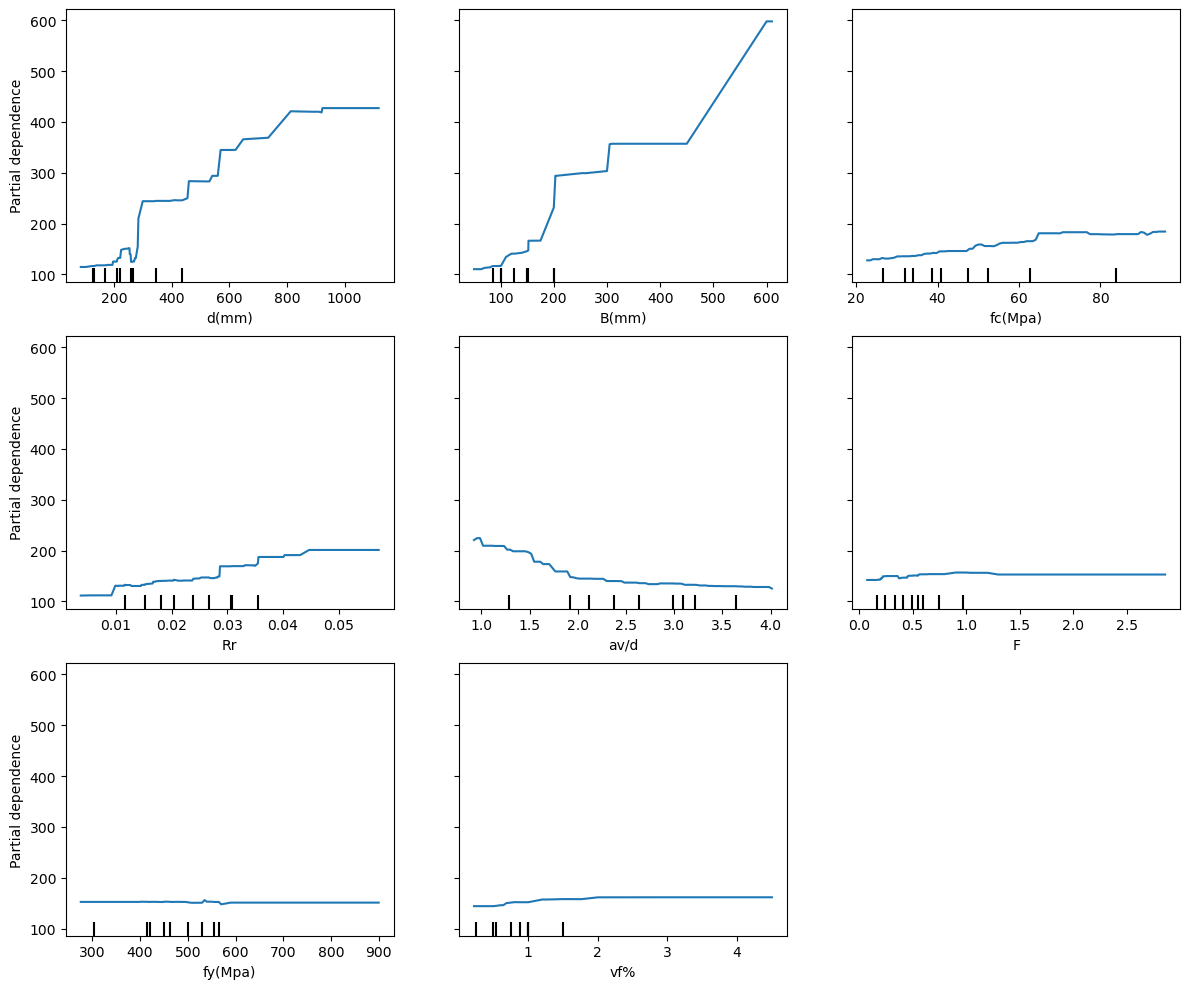

In [57]:
fig, ax = plt.subplots(figsize=(12, 10))  # Increase figure size
display = PartialDependenceDisplay.from_estimator(xgb_model, X_train, features, ax=ax)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
